- Download the Mall Customer Segmentation Data from the github repository below (or you can directly use the one attached in the assignment.)
- Use only 3 features (Age, Income and Spending Score) and run k-means algorithm. Determine/choose the optimum "k" value using the elbow method. Show your plot (error vs. k) and comment on plots. 
- Again with the same 3 features, scatter your data in a 3D plot. Coloring of samples should denote the determined categories (your optimum k). I.e. we should be able to distinguish the samples of k categories. Comment on optimum k value.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [29]:
!git clone https://github.com/UMBC-Data-Science/DATA602Datasets.git

fatal: destination path 'DATA602Datasets' already exists and is not an empty directory.


In [30]:
df = pd.read_csv("./DATA602Datasets/Mall_Customers.csv",usecols=[2,3,4])
#df.head(10)
#print(df.shape)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


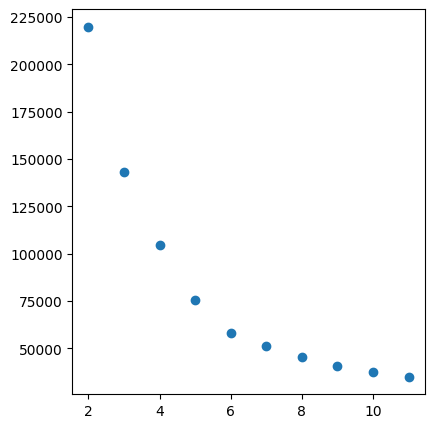

In [31]:
scores = []

for k in range(2, 12):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  scores.append( -kmeans.score(df) )
  
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot([k for k in range(2,12)], scores, 'o')

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 
When we observe the k value and score graphically, there is a noticeable decrease up to k=6.
Since the improvement in the score after 6 is insignificant, it can be accepted as the optimum value.

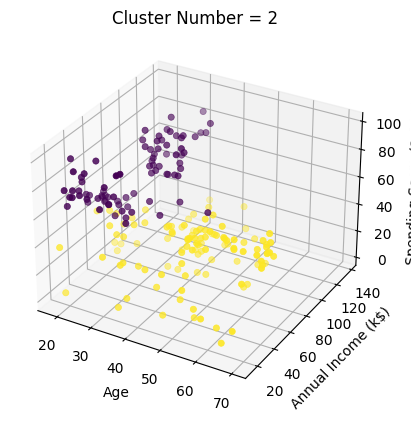

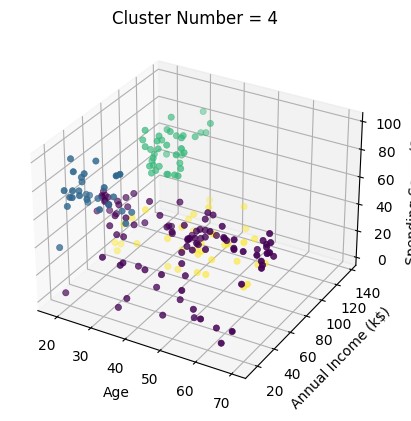

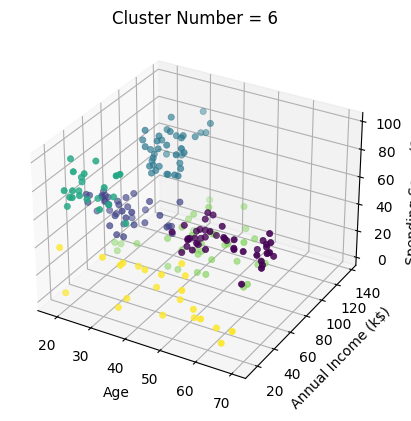

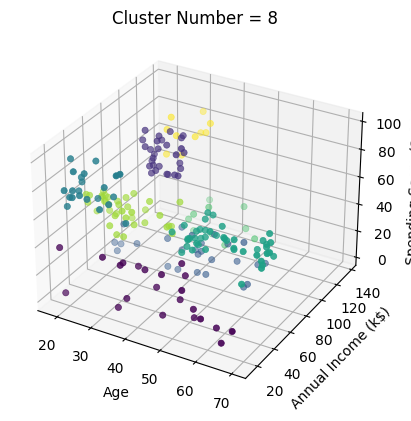

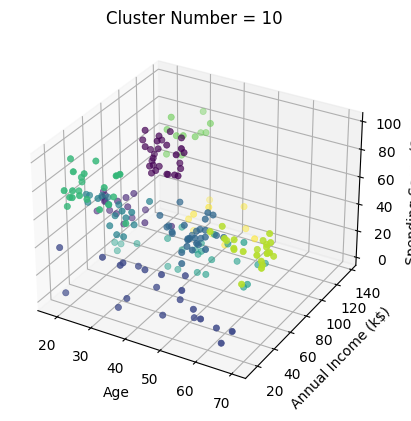

In [32]:
for i in range(2,11,2):
    n_clusters=i
    y_pred = KMeans(n_clusters=n_clusters).fit_predict(df)
    x = df.iloc[:,0]
    y = df.iloc[:,1]
    z = df.iloc[:,2]
    ax = plt.axes(projection='3d')
    ax.scatter(x, y, z, c=y_pred, cmap='viridis', linewidth=0.5);
    plt.title("Cluster Number = "+ str(i))
    ax.set_ylabel("Annual Income (k$)")
    ax.set_zlabel("Spending Score (1-100)")
    ax.set_xlabel("Age")
    plt.show()

If we examine the graphs, we can visually confirm that the integrated structures (groups) are separated sufficiently in 6. Therefore, the optimum value is 6.
There is no need for the groups to get smaller at increasing values, as the score is not high for us.

In [33]:
# REFERENCES
# https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58 -> Split dataset
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html -> 3D model
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/ -> Elbow method definition